In [1]:
!git clone https://github.com/jasonfghx/diffusion_g.git

Cloning into 'diffusion_g'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (553/553), done.
remote: Compressing objects: 100% (539/539), done.
remote: Total 553 (delta 146), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (553/553), 108.79 MiB | 18.70 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MaxAbsScaler,RobustScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv("/content/diffusion_g/titanic/train.csv")
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})
df=df.dropna()
df.columns#顯示欄位


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
dft=pd.read_csv("/content/diffusion_g/titanic/test.csv")
pass1=pd.read_csv("/content/diffusion_g/titanic/test.csv")['PassengerId']
dft['Sex']=dft['Sex'].map({'male':0,'female':1})
dft['Embarked']=dft['Embarked'].map({'S':0,'C':1,'Q':2})
dft= dft[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [ ]:
df.isnull().sum()#確認有無缺失值, 此處無

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
x= df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df["Survived"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=7)

# Machine Learning Models

In [ ]:
lgbm_settings = {'n_estimators': 10,
 'num_leaves': 16,
 'min_child_samples': 2,
 'learning_rate': 0.11333885880532285,
 'colsample_bytree': 0.7557376218643025,
 'reg_alpha': 0.0013323317789643257,
 'reg_lambda': 0.0018596588413880056,
 'max_bin': 511,#查
 'verbose': -1}
model_lgbm  = LGBMClassifier(**lgbm_settings)

In [ ]:
model_lgbm  = LGBMClassifier(**lgbm_settings)
model_xgb = XGBClassifier(objective="multi:softmax",num_class = 7)
# model_gb = GradientBoostingClassifier(max_depth=9,min_samples_leaf=3,min_samples_split=13,subsample=0.751)
model_rfc = RandomForestClassifier(max_depth=5)
# model_logic=  LogisticRegression(max_iter=300)
# model_SVC=SVC(kernel="linear", C=0.025)
models = [model_lgbm,model_xgb,model_rfc]
for model in tqdm(models):
  model.fit(x_train,y_train)

100%|██████████| 3/3 [00:00<00:00,  6.01it/s]


In [ ]:

model_logic=  LogisticRegression(max_iter=300)

model_logic.fit(x_train,y_train)
print('train ACC',model_logic.score(x_train,y_train))
print('test ACC',model_logic.score(x_test,y_test))

train ACC 0.7876712328767124
test ACC 0.7567567567567568


In [ ]:
for model in models:
  model_name = type(model).__name__
  print(f"score for {model_name} on train data: {model.score(x_train,y_train)}")
  print(f"score for {model_name} on test data: {model.score(x_test,y_test)}")

score for LGBMClassifier on train data: 0.952054794520548
score for LGBMClassifier on test data: 0.7567567567567568
score for XGBClassifier on train data: 1.0
score for XGBClassifier on test data: 0.6756756756756757
score for RandomForestClassifier on train data: 0.9178082191780822
score for RandomForestClassifier on test data: 0.7027027027027027


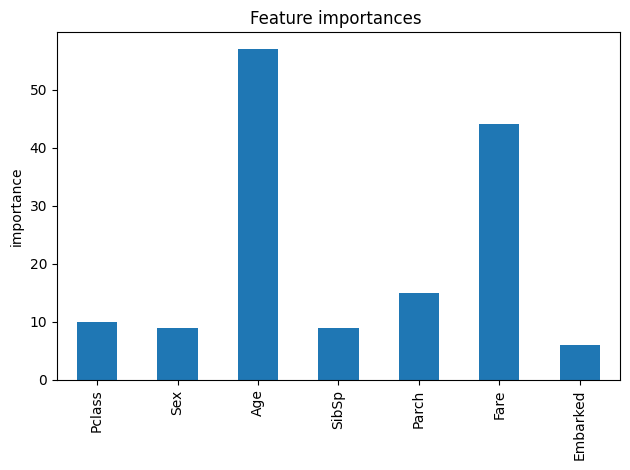

In [ ]:
importances = model_lgbm.feature_importances_
feature_names=list(x_train.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances ")
ax.set_ylabel("importance")
fig.tight_layout()

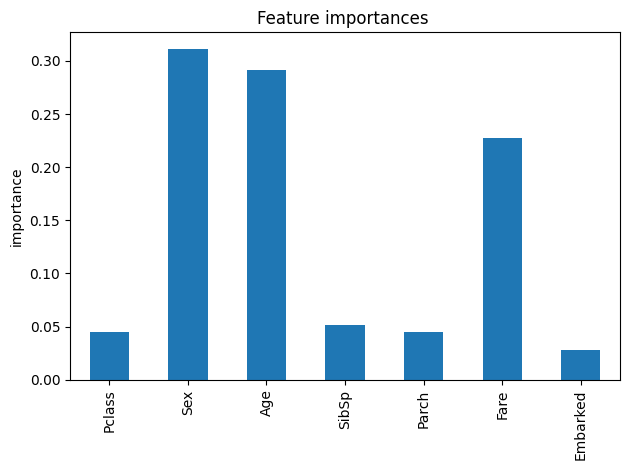

In [ ]:

importances = model_rfc.feature_importances_
feature_names=list(x_train.columns)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances ")
ax.set_ylabel("importance")
fig.tight_layout()

In [ ]:
pd.DataFrame({'PassengerId':pass1,'Survived':model_rfc.predict(dft)}).to_csv("submissions.csv",index=False)

In [14]:
from sklearn.ensemble import RandomForestClassifier

#data["Age"] = data["Age"].astype(int)
#if ["Age"]
x= df[["Pclass", "Sex", "SibSp", "Parch"]]
y=df["Survived"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=7)


model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           oob_score=True,
                                           random_state=10,
                                           n_jobs=-1,
                                           verbose=1)
model.fit(x_train, y_train)
dft=pd.read_csv("/content/diffusion_g/titanic/test.csv")
pass1=pd.read_csv("/content/diffusion_g/titanic/test.csv")['PassengerId']
dft['Sex']=dft['Sex'].map({'male':0,'female':1})
dft['Embarked']=dft['Embarked'].map({'S':0,'C':1,'Q':2})
dft= dft[["Pclass", "Sex", "SibSp", "Parch"]]
predictions = model.predict(dft)

output = pd.DataFrame({'PassengerId': pass1, 'Survived': predictions})
output.to_csv('submission.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished
